## Library import and version checking

In [1]:
import sys
import pandas as pd
from alts import check_version, alts_load, alts_plot, alts_filter

pd.set_option('display.float_format', '{:.5f}'.format)
check_version.print_requirement()
check_version.print_versions()

print(f"Python version: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")


#########  
Please ensure you have the following versions installed:
Pandas version: 1.5.2
NumPy version: 1.24.1
tkinter version: 8.5
Matplotlib version: 3.6.2
Seaborn version: 0.12.1
Bokeh version: 3.0.3

To install these versions, you can use the following commands:
pip install pandas==1.5.2
pip install numpy==1.24.1
pip install tkinter==8.5
pip install matplotlib==3.6.2
pip install seaborn==0.12.1
pip install bokeh==3.0.3

#########  

Python Version: 3.9.6 (default, Oct  4 2024, 08:01:31) 
[Clang 16.0.0 (clang-1600.0.26.4)]

Pandas version: 1.5.2
NumPy version: 1.24.1
tkinter version: 8.5
Seaborn version: 0.12.1
Bokeh version: 3.0.3
Python version: 3.9.6


## Load csv for A-tag data (atag=1 for 1 A-tag and atag=2 for 2 A-tag)

In [2]:
# dff = alts_load.alts_analysis(atag=1) # For 1 A-tag
dff, dfr = alts_load.alts_analysis(atag=2) #For 2 A-tags

2024-11-26 17:19:16.097 Python[31644:1171387] +[IMKClient subclass]: chose IMKClient_Modern


#------         FRONT data loading completed    ------#
#------         REAR data loading completed     ------#
#------ FRONT and REAR Pulse Interval Completed ------#


In [3]:
dff.head(10)

datetime        time      SPL1      SPL2  td     SPLR  \
0 2022-05-20 07:56:38.104000000 28598.10400 202.00200  39.32100   0  5.13725   
1 2022-05-20 07:56:42.311999744 28602.31200 330.75900  59.36700   0  5.57143   
2 2022-05-20 07:56:42.313000192 28602.31300 231.30000 138.00900   0  1.67598   
3 2022-05-20 07:56:42.359500032 28602.35950 178.10100  57.05400   0  3.12162   
4 2022-05-20 07:56:42.393000192 28602.39300 185.04000  52.42800   0  3.52941   
5 2022-05-20 07:56:42.394499840 28602.39450 191.20800  43.17600   0  4.42857   
6 2022-05-20 07:56:42.398499840 28602.39850 165.76500  15.42000   0 10.75000   
7 2022-05-20 07:56:42.399499776 28602.39950 256.74300  40.09200   0  6.40385   
8 2022-05-20 07:56:42.400000000 28602.40000 314.56800  57.05400   0  5.51351   
9 2022-05-20 07:56:42.400499712 28602.40050 606.77700  58.59600   0 10.35526   

                  datetime_next  PulseInterval  
0 2022-05-20 07:56:42.311999744        4.20800  
1 2022-05-20 07:56:42.313000192        0.00100  
2 2022-05-20 07:56:42.359500032        0.04650  
3 2022-05-20 07:56:42.393000192        0.03350  
4 2022-05-20 07:56:42.394499840        0.00150  
5 2022-05-20 07:56:42.398499840        0.00400  
6 2022-05-20 07:56:42.399499776        0.00100  
7 2022-05-20 07:56:42.400000000        0.00050  
8 2022-05-20 07:56:42.400499712        0.00050  
9 2022-05-20 07:56:42.401500160        0.00100

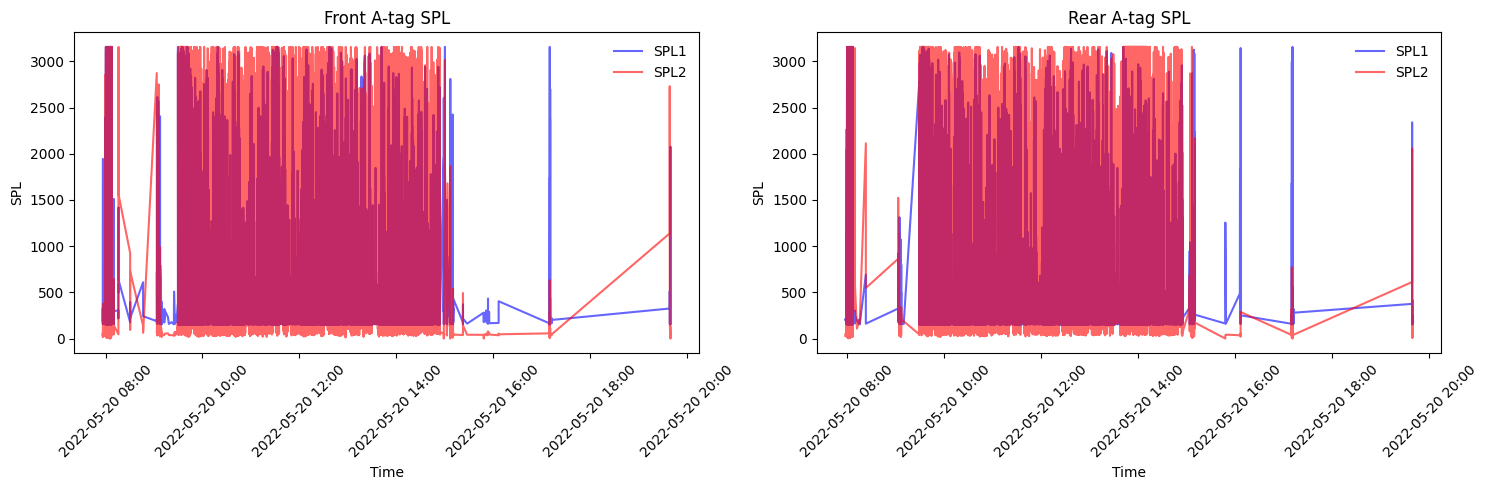

In [4]:
alts_plot.spl_time_plot(dff, dfr)

In [ ]:
from scipy.signal import savgol_filter
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# data_dff = dff.copy()

# td_mean = data_dff['td'].mean()
# td_std = data_dff['td'].std()
# data_dff = data_dff[(data_dff['td'] > td_mean - 3*td_std) & (data_dff['td'] < td_mean + 3*td_std)]

# data_dff['td_filtered'] = savgol_filter(data_dff['td'], window_length=11, polyorder=2) # Signal filtering
# zero_crossings = np.where(np.diff(np.sign(data_dff['td_filtered'])))[0]
# data_dff['zero_crossing'] = 0
# data_dff.iloc[zero_crossings, data_dff.columns.get_loc('zero_crossing')] = 1

# # Clustering
# features = data_dff[['td_filtered', 'SPL1', 'SPL2']]
# db = DBSCAN(eps=0.5, min_samples=5).fit(features)
# data_dff['cluster'] = db.labels_
########################################################
data_dfr = dfr.copy()

td_mean = data_dfr['td'].mean()
td_std = data_dfr['td'].std()
data_dfr = data_dfr[(data_dfr['td'] > td_mean - 3*td_std) & (data_dfr['td'] < td_mean + 3*td_std)]

data_dfr['td_filtered'] = savgol_filter(data_dfr['td'], window_length=51, polyorder=2) # Signal filtering
zero_crossings = np.where(np.diff(np.sign(data_dfr['td_filtered'])))[0]

threshold = 0.5  # Adjust based on data characteristics
valid_zero_crossings = zero_crossings[(data_dfr['td_filtered'][zero_crossings] > threshold) | 
                                      (data_dfr['td_filtered'][zero_crossings] < -threshold)]

min_distance = 10  # Minimum number of samples between zero-crossings
filtered_zero_crossings = []
last_crossing = -min_distance

for crossing in valid_zero_crossings:
    if crossing - last_crossing > min_distance:
        filtered_zero_crossings.append(crossing)
        last_crossing = crossing

# Update DataFrame
data_dfr['zero_crossing'] = 0
data_dfr.iloc[filtered_zero_crossings, data_dfr.columns.get_loc('zero_crossing')] = 1

# data_dfr['zero_crossing'] = 0
# data_dfr.iloc[zero_crossings, data_dfr.columns.get_loc('zero_crossing')] = 1

# Clustering
features = data_dfr[['td_filtered', 'SPL1', 'SPL2']]
db = DBSCAN(eps=0.5, min_samples=5).fit(features)
data_dfr['cluster'] = db.labels_

# Visualization
plt.figure(figsize=(20,5))
plt.plot(data_dfr['datetime'], data_dfr['td_filtered'])
plt.scatter(data_dfr.loc[data_dfr['zero_crossing'] == 1, 'datetime'],
            data_dfr.loc[data_dfr['zero_crossing'] == 1, 'td_filtered'],
            color='red', zorder=20)
plt.ylim(-500, 500)
plt.show()

In [23]:
data_dff.cluster.unique()

array([-1,  0])

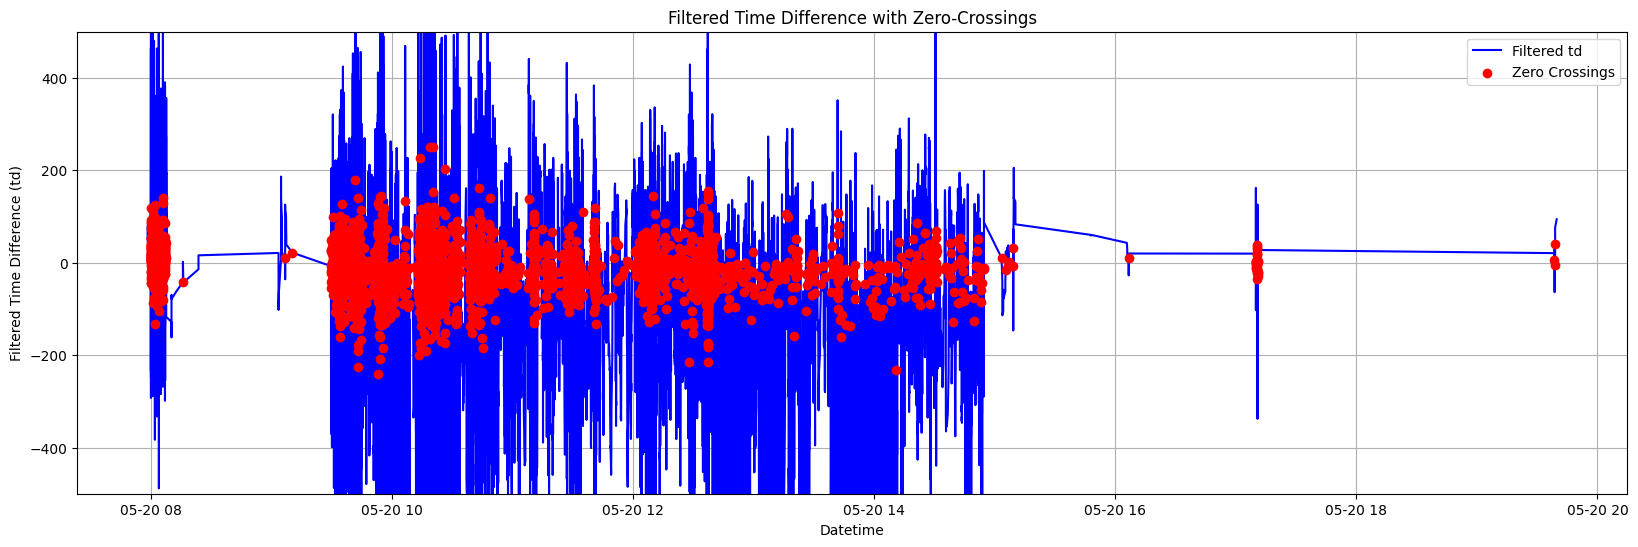

In [33]:
data_dfr = dfr.copy()

# ---------------------------------
# 2. Data Preprocessing and Cleaning
# ---------------------------------

# a. Handle Missing Values
# Drop rows with any missing values in critical columns
data_dfr.dropna(subset=['td', 'SPL1', 'SPL2'], inplace=True)

# b. Outlier Detection and Removal based on 'td' column
td_mean = data_dfr['td'].mean()
td_std = data_dfr['td'].std()

# Filter out rows where 'td' is beyond 3 standard deviations from the mean
data_dfr = data_dfr[(data_dfr['td'] > td_mean - 3 * td_std) & 
                    (data_dfr['td'] < td_mean + 3 * td_std)]

# Reset index to ensure integer-based indexing after filtering
data_dfr.reset_index(drop=True, inplace=True)

# ---------------------------------
# 3. Signal Filtering (Noise Reduction)
# ---------------------------------

# Apply Savitzky-Golay filter to smooth the 'td' signal
# Parameters can be adjusted based on data characteristics
window_length = 21  # Must be a positive odd integer
polyorder = 2       # Polynomial order

# Ensure window_length is less than or equal to the size of the data
if window_length > len(data_dfr):
    window_length = len(data_dfr) if len(data_dfr) % 2 != 0 else len(data_dfr) - 1
    print(f"Adjusted window_length to {window_length} based on data size.")

# Apply the filter
data_dfr['td_filtered'] = savgol_filter(data_dfr['td'], window_length=window_length, polyorder=polyorder)

# ---------------------------------
# 4. Zero-Crossing Detection
# ---------------------------------

# a. Detect Zero-Crossings in the Filtered Signal
zero_crossings = np.where(np.diff(np.sign(data_dfr['td_filtered'])))[0]

# b. Apply Threshold to Filter Valid Zero-Crossings
threshold = 0.5  # Adjust based on data characteristics

# Ensure that zero_crossings are within the bounds of the DataFrame
zero_crossings = zero_crossings[zero_crossings < len(data_dfr)]

# Extract 'td_filtered' values at zero_crossings
td_at_zero = data_dfr['td_filtered'].iloc[zero_crossings]

# Identify valid zero_crossings where the signal exceeds the threshold
valid_zero_crossings = zero_crossings[(td_at_zero > threshold) | (td_at_zero < -threshold)]

# c. Enforce Minimum Distance Between Zero-Crossings
min_distance = 10  # Minimum number of samples between zero-crossings
filtered_zero_crossings = []
last_crossing = -min_distance

for crossing in valid_zero_crossings:
    if crossing - last_crossing > min_distance:
        filtered_zero_crossings.append(crossing)
        last_crossing = crossing

# ---------------------------------
# 5. Mark Zero-Crossings in the DataFrame
# ---------------------------------

# Initialize 'zero_crossing' column with 0
data_dfr['zero_crossing'] = 0

# Mark the detected zero-crossings with 1
data_dfr.iloc[filtered_zero_crossings, data_dfr.columns.get_loc('zero_crossing')] = 1

# ---------------------------------
# 6. Clustering Using DBSCAN
# ---------------------------------

# Define features for clustering
features = data_dfr[['td_filtered', 'SPL1', 'SPL2']]

# Initialize and fit DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
db.fit(features)

# Assign cluster labels to the DataFrame
data_dfr['cluster'] = db.labels_

# ---------------------------------
# 7. Visualization
# ---------------------------------

plt.figure(figsize=(20, 6))

# Plot the filtered 'td' signal
plt.plot(data_dfr['datetime'], data_dfr['td_filtered'], label='Filtered td', color='blue')

# Highlight zero-crossings
plt.scatter(
    data_dfr.loc[data_dfr['zero_crossing'] == 1, 'datetime'],
    data_dfr.loc[data_dfr['zero_crossing'] == 1, 'td_filtered'],
    color='red',
    label='Zero Crossings',
    zorder=5
)

# Customize plot
plt.xlabel('Datetime')
plt.ylabel('Filtered Time Difference (td)')
plt.title('Filtered Time Difference with Zero-Crossings')
plt.legend()
plt.ylim(-500, 500)  # Adjust based on your data's range
plt.grid(True)
plt.show()

# ---------------------------------
# 8. Optional: Save the Processed Data
# ---------------------------------

# Uncomment the following line to save the processed DataFrame to a new CSV file
# data_dfr.to_csv('processed_echolocation_data.csv', index=False)

In [34]:
alts_plot.plot_alts_result(dff=data_dff.loc[data_dfr['zero_crossing'] == 1], dfr=data_dfr, time_diff=0, atag=2)

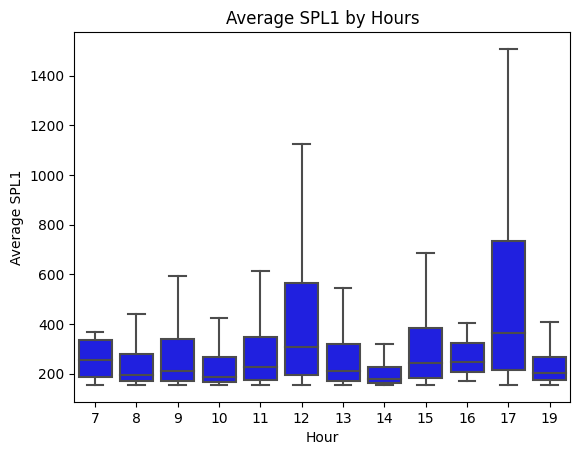

In [5]:
alts_plot.spl_time_distribution_plot(dff)

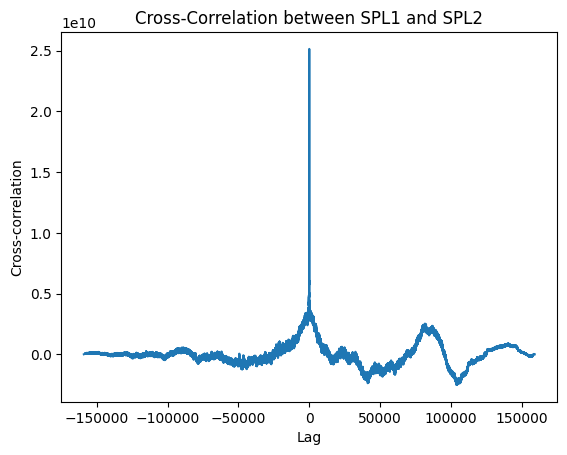

In [6]:
alts_plot.spl_cross_corr(dff)

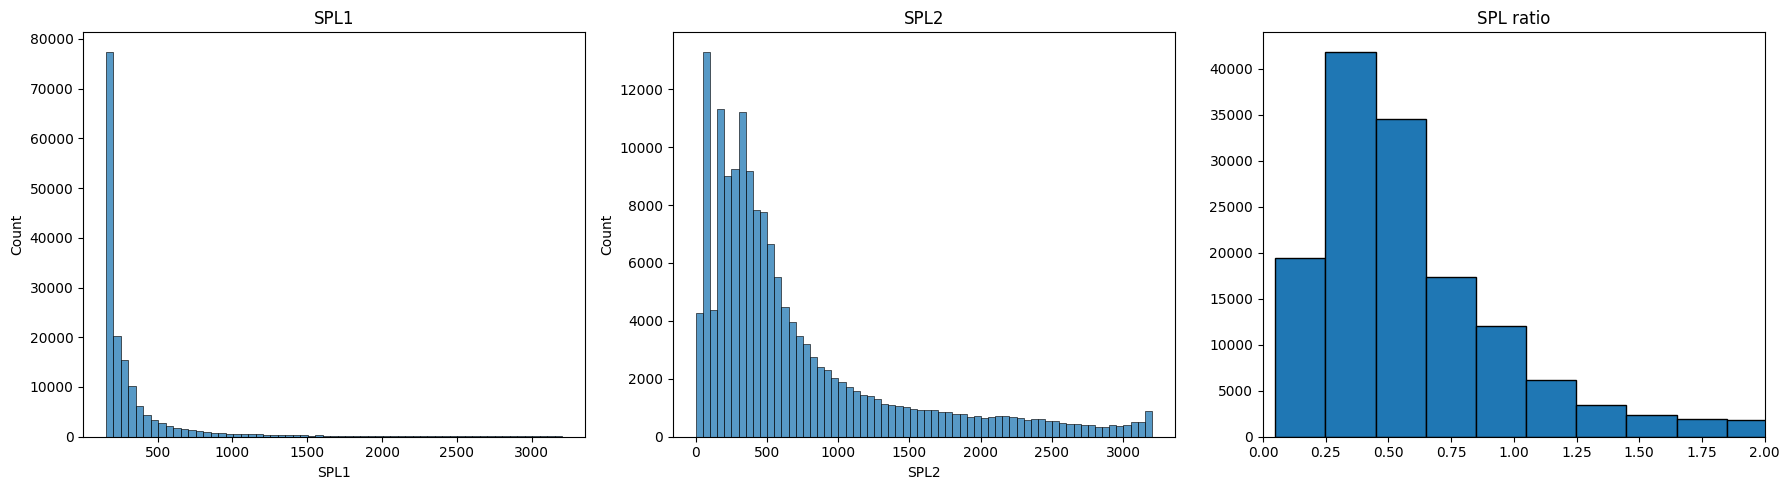

In [10]:
alts_plot.spl_distribution_plot(dff, xlim_SPLR=(0, 2), binwidth_SPLR=0.2)

## Analysis Visualisation

In [5]:
alts_plot.plot_alts_result(dff=dff.iloc[50000:100000], dfr=dfr.iloc[50000:100000], time_diff=0, atag=2)

In [ ]:
noise_condition = '1'  # Change as needed
dff_cleaned = alts_filter.cleanup(dff, noise_condition)

In [ ]:
dfr_cleaned = alts_filter.cleanup(dfr, noise_condition)

In [16]:
alts_plot.plot_alts_result(dff=dff_cleaned, dfr=dfr_cleaned, time_diff=-0.25700, atag=2)

## Anomality detection

In [ ]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
import hdbscan
import matplotlib.pyplot as plt

features = dff[['SPL1', 'SPL2', 'td', 'SPLR']]  # Adjust columns as needed

# Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(embedding)

# Plotting the results
plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='Spectral', s=5)
plt.colorbar(label='Cluster label')
plt.title('UMAP projection of Acoustic Tag Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

# Optional: Review cluster statistics or specific cases
# Print cluster membership
print("Cluster memberships:\n", cluster_labels)

# Further analysis can be done here based on clusters and your specific needs

In [ ]:
data = dff.copy()
data.set_index('datetime', inplace=True)

# Resample data into 10-second bins
resampled_data = data.resample('10S').agg({
    'SPL1': ['mean', 'std'],
    'SPL2': ['mean', 'std'],
    'td': ['mean', 'std'],
    'SPLR': ['mean', 'std']
})

# Flatten the columns after resampling
resampled_data.columns = ['_'.join(col).strip() for col in resampled_data.columns.values]


In [ ]:
data = dff.copy()
data.set_index('datetime', inplace=True)
resampled_data['range_SPL1'] = data['SPL1'].resample('10S').apply(lambda x: x.max() - x.min())
# resampled_data['skew_SPL1'] = data['SPL1'].resample('10S').skew()
resampled_data['90pct_SPL1'] = data['SPL1'].resample('10S').quantile(0.9)

# Ensure these features are added to the DataFrame properly
resampled_data.reset_index(inplace=True) 

In [ ]:
resampled_data.columns

Index(['datetime', 'SPL1_mean', 'SPL1_std', 'SPL2_mean', 'SPL2_std', 'td_mean',
       'td_std', 'SPLR_mean', 'SPLR_std', 'range_SPL1', '90pct_SPL1'],
      dtype='object')

/Users/hoyuenwa/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


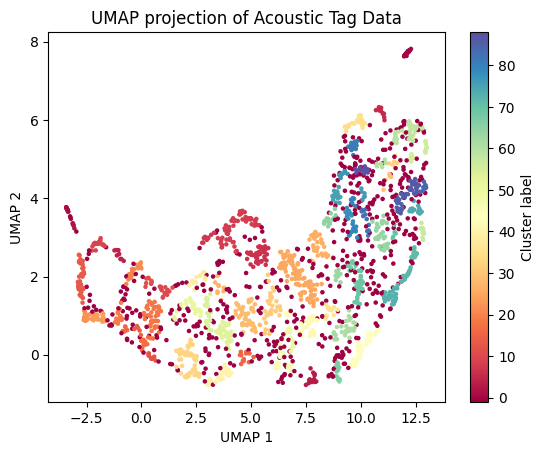

Cluster memberships:
 [ 4 34 21 ... -1  8  0]


In [ ]:
features = resampled_data.dropna()[['SPL1_mean', 'SPL1_std', 'SPL2_mean', 'SPL2_std', 'td_mean',
       'td_std', 'SPLR_mean', 'SPLR_std', 'range_SPL1', '90pct_SPL1']]  # Adjust columns as needed

# Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(embedding)

# Plotting the results
plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='Spectral', s=5)
plt.colorbar(label='Cluster label')
plt.title('UMAP projection of Acoustic Tag Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

# Optional: Review cluster statistics or specific cases
# Print cluster membership
print("Cluster memberships:\n", cluster_labels)

# Further analysis can be done here based on clusters and your specific needs

In [ ]:
data = dff.copy()
data.head(5)

datetime        time      SPL1      SPL2  td    SPLR  \
0 2022-05-20 07:56:38.104000000 28598.10400 202.00200  39.32100   0 5.13725   
1 2022-05-20 07:56:42.311999744 28602.31200 330.75900  59.36700   0 5.57143   
2 2022-05-20 07:56:42.313000192 28602.31300 231.30000 138.00900   0 1.67598   
3 2022-05-20 07:56:42.359500032 28602.35950 178.10100  57.05400   0 3.12162   
4 2022-05-20 07:56:42.393000192 28602.39300 185.04000  52.42800   0 3.52941   

                  datetime_next  PulseInterval  
0 2022-05-20 07:56:42.311999744        4.20800  
1 2022-05-20 07:56:42.313000192        0.00100  
2 2022-05-20 07:56:42.359500032        0.04650  
3 2022-05-20 07:56:42.393000192        0.03350  
4 2022-05-20 07:56:42.394499840        0.00150

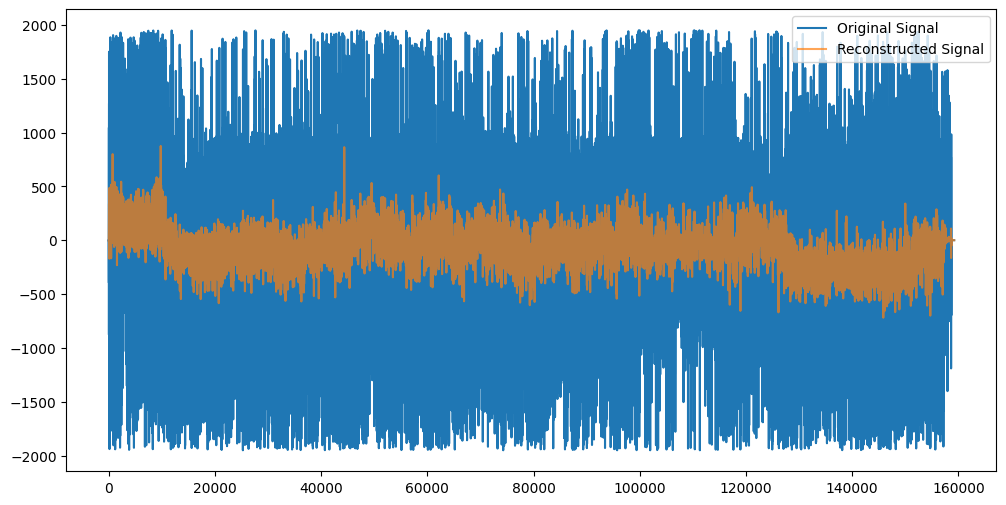

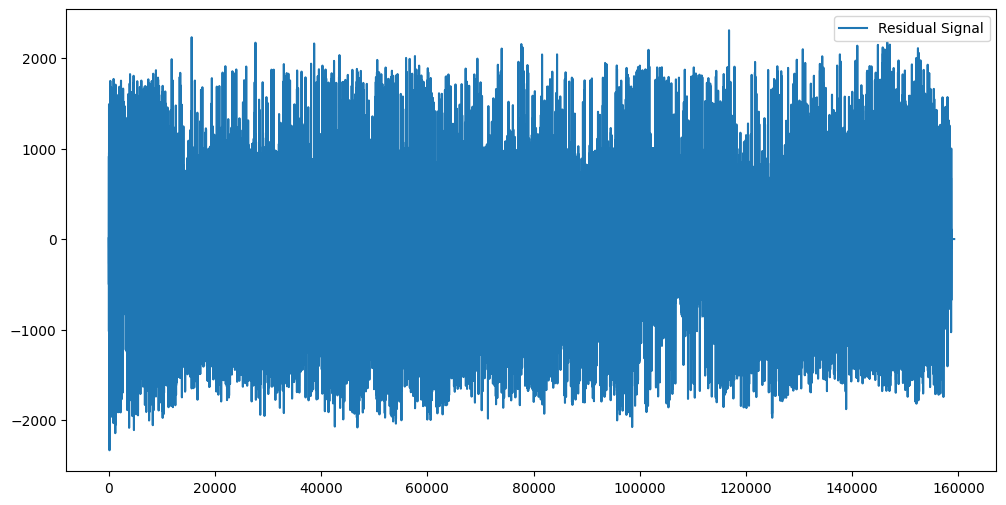

In [ ]:
import pywt
signal = data['td'].values

# Apply a discrete wavelet transform with a different wavelet and fewer levels removed
coeffs = pywt.wavedec(signal, 'sym5', level=6)  # 'sym5' might be better for noisy data

# Modify this line to remove fewer high-frequency components
coeffs_high_freq_removed = [coeffs[i] if i < 3 else np.zeros_like(coeffs[i]) for i in range(len(coeffs))]

reconstructed_signal = pywt.waverec(coeffs_high_freq_removed, 'sym5')

# Calculate the difference signal
residual_signal = signal - reconstructed_signal

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(signal, label='Original Signal')
plt.plot(reconstructed_signal, label='Reconstructed Signal', alpha=0.7)
plt.legend()
plt.show()

# Plot the residual signal
plt.figure(figsize=(12, 6))
plt.plot(residual_signal, label='Residual Signal')
plt.legend()
plt.show()

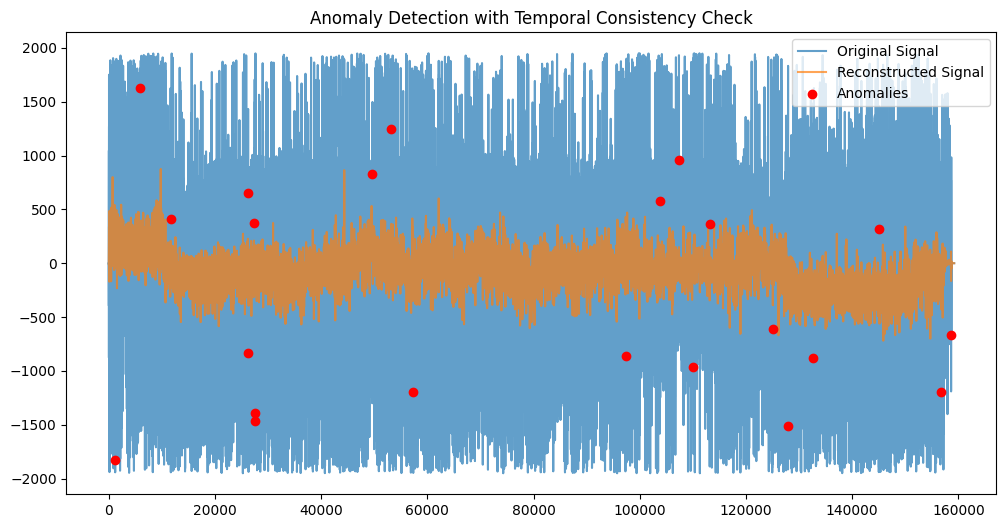

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate residuals
residuals = pd.Series(signal - reconstructed_signal)

# Calculate rolling mean and standard deviation
rolling_mean = residuals.rolling(window=1000, center=True).mean()
rolling_std = residuals.rolling(window=1000, center=True).std()

# Define a dynamic threshold for anomaly detection
dynamic_threshold_upper = rolling_mean + 1.5 * rolling_std
dynamic_threshold_lower = rolling_mean - 1.5 * rolling_std

# Identify points where the absolute residual exceeds the dynamic threshold
exceeds_upper = residuals > dynamic_threshold_upper
exceeds_lower = residuals < dynamic_threshold_lower

# Define a temporal consistency requirement (e.g., at least 5 consecutive points must exceed the threshold)
min_consecutive_points = 5

# Apply temporal consistency check
anomalies = (exceeds_upper | exceeds_lower)
anomalies = anomalies * 1  # Convert boolean to int
anomalies = anomalies.rolling(window=min_consecutive_points).sum()
anomalies = anomalies >= min_consecutive_points

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(signal, label='Original Signal', alpha=0.7)
plt.plot(reconstructed_signal, label='Reconstructed Signal', alpha=0.7)
plt.scatter(anomalies.index[anomalies], signal[anomalies], color='red', label='Anomalies', zorder=5)
plt.legend()
plt.title('Anomaly Detection with Temporal Consistency Check')
plt.show()

In [ ]:
dff[anomalies]

datetime        time      SPL1       SPL2    td  \
1230   2022-05-20 08:00:06.493999872 28806.49400 265.22400  163.45200 -1825   
5970   2022-05-20 08:04:00.207500032 29040.20750 181.18500  198.91800  1623   
11697  2022-05-20 09:30:34.276500224 34234.27650 184.26900  376.24800   410   
26266  2022-05-20 09:34:42.975999744 34482.97600 528.13500  192.75000   654   
26267  2022-05-20 09:34:42.984499968 34482.98450 181.95600  243.63600  -837   
27450  2022-05-20 09:34:55.035500032 34495.03550 155.74200  300.69000   370   
27451  2022-05-20 09:34:55.065999872 34495.06600 629.13600 2157.25800 -1388   
27452  2022-05-20 09:34:55.066500096 34495.06650 474.93600 2157.25800 -1462   
49487  2022-05-20 10:05:11.912499968 36311.91250 157.28400  370.08000   825   
53245  2022-05-20 10:17:19.396999936 37039.39700 163.45200  456.43200  1249   
57216  2022-05-20 10:19:06.124000000 37146.12400 308.40000  163.45200 -1197   
97339  2022-05-20 12:36:58.742499840 45418.74250 203.54400  276.78900  -864   
103819 2022-05-20 12:37:07.789500160 45427.78950 208.94100  269.85000   577   
107325 2022-05-20 12:37:09.894499840 45429.89450 976.08600 1333.05900   955   
110060 2022-05-20 12:37:11.442999808 45431.44300 388.58400  259.82700  -968   
113217 2022-05-20 12:37:13.227000320 45433.22700 291.43800  334.61400   363   
125132 2022-05-20 13:41:49.041500160 49309.04150 215.88000  258.28500  -611   
127925 2022-05-20 13:57:44.147500032 50264.14750 439.47000 2200.43400 -1514   
132725 2022-05-20 14:06:21.301499904 50781.30150 399.37800 1219.72200  -880   
145012 2022-05-20 14:17:55.583000064 51475.58300 328.44600  645.32700   317   
156807 2022-05-20 14:52:42.882999808 53562.88300 191.20800  342.32400 -1193   
158682 2022-05-20 19:38:35.644000000 70715.64400 218.19300 1622.95500  -665   

          SPLR                 datetime_next  PulseInterval  
1230   1.62264 2022-05-20 08:00:06.497000192        0.00300  
5970   0.91085 2022-05-20 08:04:00.213499904        0.00600  
11697  0.48975 2022-05-20 09:30:34.324000000        0.04750  
26266  2.74000 2022-05-20 09:34:42.984499968        0.00850  
26267  0.74684 2022-05-20 09:34:42.986499840        0.00200  
27450  0.51795 2022-05-20 09:34:55.065999872        0.03050  
27451  0.29164 2022-05-20 09:34:55.066500096        0.00050  
27452  0.22016 2022-05-20 09:34:55.067999744        0.00150  
49487  0.42500 2022-05-20 10:05:12.438499840        0.52600  
53245  0.35811 2022-05-20 10:17:19.401500160        0.00450  
57216  1.88679 2022-05-20 10:19:06.137000192        0.01300  
97339  0.73538 2022-05-20 12:36:58.756999936        0.01450  
103819 0.77429 2022-05-20 12:37:07.790500096        0.00100  
107325 0.73222 2022-05-20 12:37:09.895000064        0.00050  
110060 1.49555 2022-05-20 12:37:11.443500032        0.00050  
113217 0.87097 2022-05-20 12:37:13.227500032        0.00050  
125132 0.83582 2022-05-20 13:41:49.042500096        0.00100  
127925 0.19972 2022-05-20 13:57:44.300000256        0.15250  
132725 0.32743 2022-05-20 14:06:21.302000128        0.00050  
145012 0.50896 2022-05-20 14:17:55.583500032        0.00050  
156807 0.55856 2022-05-20 14:52:42.951000320        0.06800  
158682 0.13444 2022-05-20 19:38:35.846499840        0.20250

## GPT 4o mini

In [6]:
dff

datetime        time      SPL1      SPL2  td  \
0      2022-05-20 07:56:38.104000000 28598.10400 202.00200  39.32100   0   
1      2022-05-20 07:56:42.311999744 28602.31200 330.75900  59.36700   0   
2      2022-05-20 07:56:42.313000192 28602.31300 231.30000 138.00900   0   
3      2022-05-20 07:56:42.359500032 28602.35950 178.10100  57.05400   0   
4      2022-05-20 07:56:42.393000192 28602.39300 185.04000  52.42800   0   
...                              ...         ...       ...       ...  ..   
159221 2022-05-20 19:39:31.492999936 70771.49300 180.41400  54.74100   0   
159222 2022-05-20 19:39:31.506000128 70771.50600 276.78900  47.80200   0   
159223 2022-05-20 19:39:31.506499840 70771.50650 276.01800  43.17600   0   
159224 2022-05-20 19:39:31.511000064 70771.51100 156.51300  46.26000   0   
159225 2022-05-20 19:39:31.512999936 70771.51300 227.44500  34.69500   0   

          SPLR                 datetime_next  PulseInterval  
0      5.13725 2022-05-20 07:56:42.311999744        4.20800  
1      5.57143 2022-05-20 07:56:42.313000192        0.00100  
2      1.67598 2022-05-20 07:56:42.359500032        0.04650  
3      3.12162 2022-05-20 07:56:42.393000192        0.03350  
4      3.52941 2022-05-20 07:56:42.394499840        0.00150  
...        ...                           ...            ...  
159221 3.29577 2022-05-20 19:39:31.506000128        0.01300  
159222 5.79032 2022-05-20 19:39:31.506499840        0.00050  
159223 6.39286 2022-05-20 19:39:31.511000064        0.00450  
159224 3.38333 2022-05-20 19:39:31.512999936        0.00200  
159225 6.55556                           NaT            NaN  

[159226 rows x 8 columns]

In [7]:
df = dff.copy()

In [8]:
df['td_diff'] = df['td'].diff()

# Calculate moving average of td_diff
window_size = 5  # Adjust based on your data's temporal resolution
df['td_diff_ma'] = df['td_diff'].rolling(window=window_size).mean()

# Calculate moving average of SPL1 and SPL2
df['SPL1_ma'] = df['SPL1'].rolling(window=window_size).mean()
df['SPL2_ma'] = df['SPL2'].rolling(window=window_size).mean()

# Calculate SPL Ratio if SPLR isn't already SPL1/SPL2
df['SPL_ratio'] = df['SPL1_ma'] / df['SPL2_ma']

In [9]:
df

datetime        time      SPL1      SPL2  td  \
0      2022-05-20 07:56:38.104000000 28598.10400 202.00200  39.32100   0   
1      2022-05-20 07:56:42.311999744 28602.31200 330.75900  59.36700   0   
2      2022-05-20 07:56:42.313000192 28602.31300 231.30000 138.00900   0   
3      2022-05-20 07:56:42.359500032 28602.35950 178.10100  57.05400   0   
4      2022-05-20 07:56:42.393000192 28602.39300 185.04000  52.42800   0   
...                              ...         ...       ...       ...  ..   
159221 2022-05-20 19:39:31.492999936 70771.49300 180.41400  54.74100   0   
159222 2022-05-20 19:39:31.506000128 70771.50600 276.78900  47.80200   0   
159223 2022-05-20 19:39:31.506499840 70771.50650 276.01800  43.17600   0   
159224 2022-05-20 19:39:31.511000064 70771.51100 156.51300  46.26000   0   
159225 2022-05-20 19:39:31.512999936 70771.51300 227.44500  34.69500   0   

          SPLR                 datetime_next  PulseInterval  td_diff  \
0      5.13725 2022-05-20 07:56:42.311999744        4.20800      NaN   
1      5.57143 2022-05-20 07:56:42.313000192        0.00100  0.00000   
2      1.67598 2022-05-20 07:56:42.359500032        0.04650  0.00000   
3      3.12162 2022-05-20 07:56:42.393000192        0.03350  0.00000   
4      3.52941 2022-05-20 07:56:42.394499840        0.00150  0.00000   
...        ...                           ...            ...      ...   
159221 3.29577 2022-05-20 19:39:31.506000128        0.01300  0.00000   
159222 5.79032 2022-05-20 19:39:31.506499840        0.00050  0.00000   
159223 6.39286 2022-05-20 19:39:31.511000064        0.00450  0.00000   
159224 3.38333 2022-05-20 19:39:31.512999936        0.00200  0.00000   
159225 6.55556                           NaT            NaN  0.00000   

        td_diff_ma   SPL1_ma  SPL2_ma  SPL_ratio  
0              NaN       NaN      NaN        NaN  
1              NaN       NaN      NaN        NaN  
2              NaN       NaN      NaN        NaN  
3              NaN       NaN      NaN        NaN  
4              NaN 225.44040 69.23580    3.25612  
...            ...       ...      ...        ...  
159221     0.00000 175.63380 53.19900    3.30145  
159222     0.00000 199.68900 53.35320    3.74277  
159223     0.00000 220.66020 49.80660    4.43034  
159224     0.00000 219.27240 51.34860    4.27027  
159225     0.00000 223.43580 45.33480    4.92857  

[159226 rows x 13 columns]

In [23]:
df.iloc[72700:72810].td_diff_ma.max()

373.6

In [10]:
# # Example thresholds (adjust based on your data)
# td_decrease_threshold = -0.5  # Average change per window
# pulse_interval_threshold = 0.1  # Max variation in PulseInterval
# spl_threshold = 200  # Minimum SPL to consider

# # Identify potential echolocation clicks
# df['echolocation'] = (
#     (df['td_diff_ma'] < td_decrease_threshold) &
#     (df['PulseInterval'].rolling(window=window_size).std() < pulse_interval_threshold) &
#     (df['SPL1_ma'] > spl_threshold) &
#     (df['SPL2_ma'] > spl_threshold)
# )


In [45]:
# Example thresholds (adjust based on your data)
td_decrease_threshold = 300  # Average change per window
pulse_interval_threshold = 0.1  # Max variation in PulseInterval
spl_threshold = 0.5  # Minimum SPL to consider

# Identify potential echolocation clicks
df['echolocation'] = (
    (df['td_diff_ma'] < td_decrease_threshold) &
    (df['PulseInterval'].rolling(window=window_size).std() < pulse_interval_threshold) &
    (df['SPL1_ma'] > spl_threshold) &
    (df['SPL2_ma'] > spl_threshold)
)


In [46]:
window_size = 300  # Number of consecutive points to confirm echolocation

df['echolocation_trail'] = df['echolocation'].rolling(window=window_size).sum() == window_size


### a. Labeling Data
If you have a subset of labeled data (i.e., known echolocation clicks), you can train a supervised classifier.

In [ ]:
# Example: Assuming you have a 'label' column where 1 indicates echolocation and 0 otherwise
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features for the model
features = ['SPL1_ma', 'SPL2_ma', 'td_diff_ma', 'PulseInterval', 'SPL_ratio']

# Target variable
target = 'label'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


## Unsupervised

/Users/hoyuenwa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hoyuenwa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hoyuenwa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hoyuenwa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

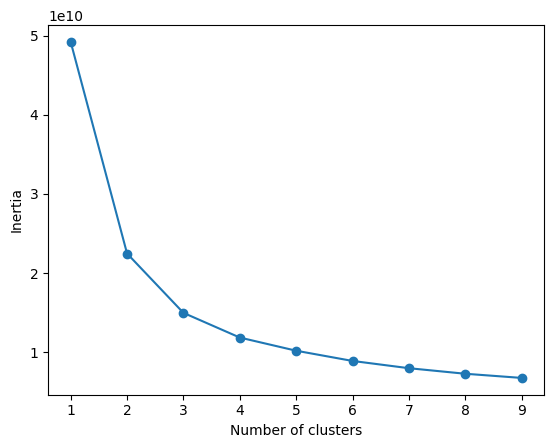

/Users/hoyuenwa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_13097/1366728871.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  echolocation_cluster = df.groupby('cluster').mean().sort_values('td_diff_ma').index[0]


In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features
X = df[features].dropna()

# Determine optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Assume optimal k=2 (e.g., echolocation vs. non-echolocation)
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features].fillna(0))

# Analyze clusters
echolocation_cluster = df.groupby('cluster').mean().sort_values('td_diff_ma').index[0]
df['echolocation_unsupervised'] = df['cluster'] == echolocation_cluster


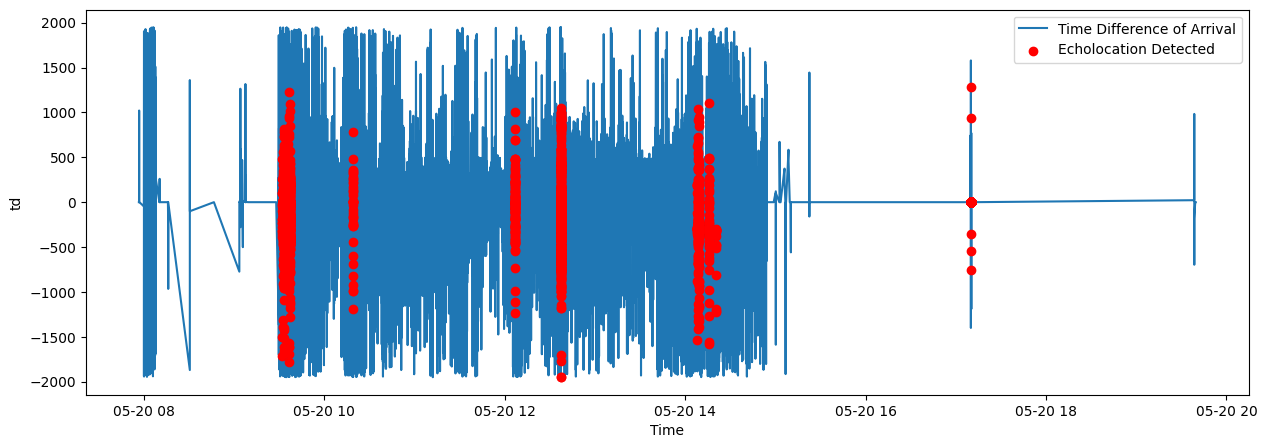

In [50]:
import matplotlib.pyplot as plt
df_plot = df.copy() #.iloc[74000:74025]

plt.figure(figsize=(15, 5))
plt.plot(df_plot['datetime'], df_plot['td'], label='Time Difference of Arrival')
plt.scatter(df_plot[df_plot['echolocation_trail']]['datetime'], df_plot[df_plot['echolocation_trail']]['td'], color='red', label='Echolocation Detected', zorder=10)
plt.xlabel('Time')
plt.ylabel('td')
plt.legend()
plt.show()


In [ ]:
pip install plotly

In [58]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add all data points
fig.add_trace(
    go.Scatter(
        x=df_plot['datetime'],
        y=df_plot['td'],
        mode='markers',
        name='All Data',
        marker=dict(color='blue', opacity=0.5)
    )
)

# Add echolocation points in red
echolocation_data = df_plot[df_plot['echolocation_trail']]

fig.add_trace(
    go.Scatter(
        x=echolocation_data['datetime'],
        y=echolocation_data['td'],
        mode='markers',
        name='Echolocation Detected',
        marker=dict(color='red', size=8)
    )
)

# Update layout
fig.update_layout(
    title='Echolocation Detection',
    xaxis_title='Datetime',
    yaxis_title='Time Difference of Arrival (td)',
    legend=dict(x=0, y=1)
)

# Show the plot
fig.show()
